<a href="https://colab.research.google.com/github/alexiakarine/Android/blob/main/serieTemporal_temperaturas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Pandas
import pandas as pd

# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Sklearn e Skforecast
from sklearn.ensemble import RandomForestRegressor

!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.8/343.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [16]:
#Carrega dados
url = 'https://raw.githubusercontent.com/alexiakarine/IA_SerieTemporal_TemperaturasSaoPaulo/main/station_sao_paulo.csv'
data = pd.read_csv(url, sep=',')
data.head(5)


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1946,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,21.74,999.90,999.90,999.90,999.90,999.90
1,1947,999.90,23.54,21.04,19.74,19.24,999.90,15.04,16.44,18.04,17.04,18.94,20.34,22.75,20.01,15.67,18.01,19.11
2,1948,23.64,22.94,20.74,20.04,18.04,16.64,17.84,15.64,18.64,18.74,20.64,21.24,22.31,19.61,16.71,19.34,19.49
3,1949,22.34,21.54,23.54,19.44,17.24,17.34,16.34,17.34,18.24,18.74,19.74,21.54,21.71,20.07,17.01,18.91,19.42
4,1950,22.14,22.44,22.24,20.44,19.44,17.94,16.44,19.14,19.54,19.04,19.94,21.94,22.04,20.71,17.84,19.51,20.02


In [38]:
# Cria um DataFrame de exemplo
data = pd.DataFrame({
    'YEAR': [1946, 1947, 1948, 1949, 1950],
    'JAN': [999.90, 999.90, 23.64, 23.34, 22.14],
    'FEB': [999.90, 23.54, 22.94, 21.54, 22.22],
    'MAR': [999.90, 21.04, 20.74, 23.54, 22.24],
    'APR':[999.90, 19.74, 20.04, 19.44, 20.44],
    'MAY':[999.90, 19.24, 18.04, 17.24, 19.44],
    'JUN':[999.90, 999.90, 16.64, 17.34, 17.94],
    'AUG':[999.90, 15.04, 17.84, 16.34, 16.44],
    'SEP':[999.90, 16.44, 15.64, 17.34, 19.14],
    'OCT':[999.90, 17.04, 18.74, 18.74, 19.04],
    'NOV':[999.90, 18.94, 20.64, 19.74, 19.94],
    'DEC':[21.74, 20.34, 21.24, 21.54, 21.94]

})

# Usa o método melt() para transformar as colunas em linhas
data_melted = pd.melt(data, id_vars=['YEAR'], value_vars=['JAN','FEV','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], var_name='Coluna', value_name='Valor') 
                      
print(data_melted)


KeyError: ignored

Train dates : 0 --- 37  (n=38)
Test dates  : 38 --- 73  (n=36)


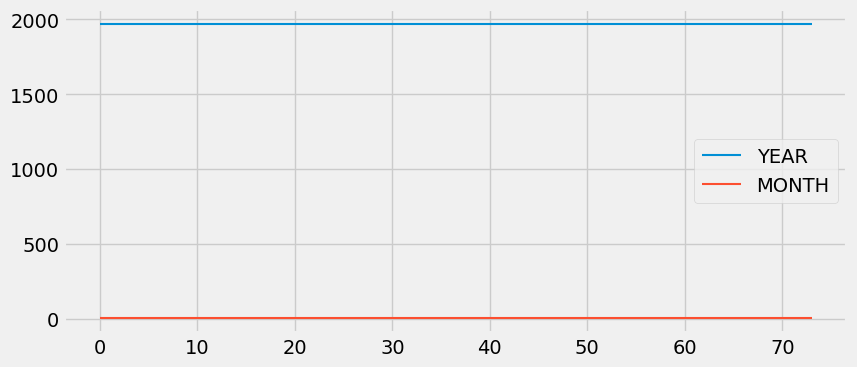

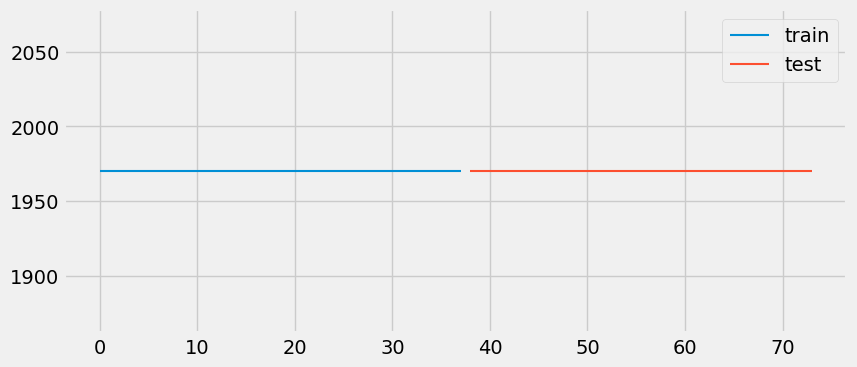